# Morfologia matemática

Importando as dependências

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

Ler a imagem e binarizar

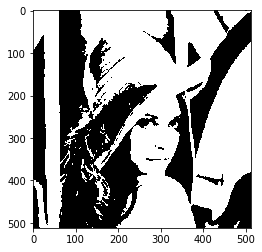

In [2]:
image_gray = cv2.imread('imagens/lena.jpg', 0)
blur = cv2.GaussianBlur(image_gray, (5, 5), 0)
ret, image_bin = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(image_bin, 'gray')
plt.show()

## Dilatação e Erosão

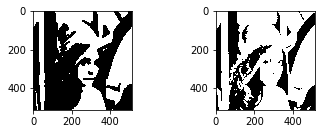

In [3]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(image_bin,kernel,iterations = 2)
dilate = cv2.dilate(image_bin,kernel,iterations = 1)

plt.subplot(221), plt.imshow(erosion, 'gray')
plt.subplot(222), plt.imshow(dilate, 'gray')
plt.show()

## Abertura e fechamento

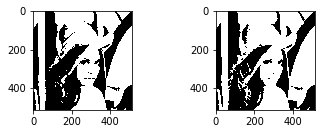

In [4]:
opening = cv2.morphologyEx(image_bin, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image_bin, cv2.MORPH_CLOSE, kernel)
plt.subplot(221), plt.imshow(opening, 'gray')
plt.subplot(222), plt.imshow(closing, 'gray')
plt.show()

## Transformada hit n miss

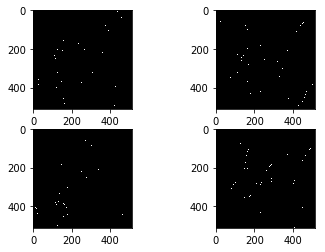

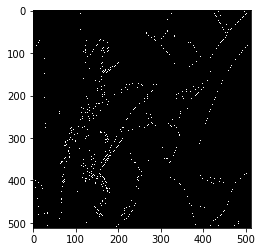

In [6]:
junction1 = np.array([[0, 1, 0], [-1, 1, 1], [-1, -1, 0]])
r1 = cv2.morphologyEx(image_bin, cv2.MORPH_HITMISS, junction1)
cv2.imshow("Junction 1", r1)

junction2 = np.array([[0, 1, 0], [1, 1, -1], [0, -1, -1]])
r2 = cv2.morphologyEx(image_bin, cv2.MORPH_HITMISS, junction2)
cv2.imshow("Junction 2", r2)

junction3 = np.array([[0, -1, -1], [1, 1, -1], [0, 1, 0]])
r3 = cv2.morphologyEx(image_bin, cv2.MORPH_HITMISS, junction3)
cv2.imshow("Junction 3", r3)

junction4 = np.array([[-1, -1, 0], [-1, 1, 1], [0, 1, 0]])
r4 = cv2.morphologyEx(image_bin, cv2.MORPH_HITMISS, junction4)
cv2.imshow("Junction 4", r4)

j12 = cv2.bitwise_or(r1, r2)
j34 = cv2.bitwise_or(r3, r4)
jall = cv2.bitwise_or(j12, j34)

plt.subplot(221), plt.imshow(r1, 'gray')
plt.subplot(222), plt.imshow(r2, 'gray')

plt.subplot(223), plt.imshow(r3, 'gray')
plt.subplot(224), plt.imshow(r4, 'gray')

plt.show()

plt.imshow(jall, 'gray')
plt.show()

## Extração de bordas

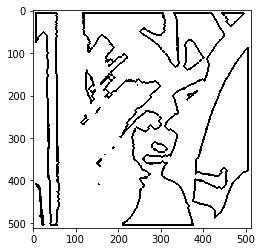

In [12]:
result, contours, hierarchy = cv2.findContours(image_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

background = np.ones(image_bin.shape,np.uint8)

cv2.drawContours(background, contours, -1, (0, 255, 0), 3)
plt.imshow(background, 'gray')
plt.show()

## Esqueletização

In [21]:
blur = cv2.GaussianBlur(image_gray, (5, 5), 0)
rect, img = cv2.threshold(blur, 160, 255, cv2.THRESH_BINARY_INV)
size = np.size(image_gray)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
skel = np.zeros(image_gray.shape, np.uint8)
done = False

while not done:
    eroded = cv2.erode(image_gray, element)
    temp = cv2.dilate(eroded, element)
    temp = cv2.subtract(image_gray, temp)
    skel = cv2.bitwise_or(skel, temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(image_gray)
    if zeros == size:
        done = True
        
plt.imshow(skel, 'gray')
plt.show()

KeyboardInterrupt: 